In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime

# Basic packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rd # generating random numbers
import datetime # manipulating date formats
# Viz
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # for prettier plots

# settings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.graph_objs as go
import plotly.express as px
from datetime import date, timedelta
from sklearn.cluster import KMeans
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
import plotly.offline as py
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from keras.models import Sequential
from keras.layers import LSTM,Dense
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [85]:
# import os
# last_update = '2020-04-30'
# print(f'[Dataset list] (as of %s)'%last_update)
# file_paths_raw = []
# for dirname, _, filenames in os.walk('coronavirusdataset'):
#     for filename in filenames:
#         file_paths_raw.append(os.path.join(dirname, filename))
# file_names = ['TimeAge.csv', 'TimeProvince.csv', 'Region.csv', 'TimeGender.csv'
#               , 'Time.csv', 'Case.csv', 'Weather.csv', 'PatientInfo.csv'
#               , 'PatientRoute.csv', 'SeoulFloating.csv', 'SearchTrend.csv', 'Policy.csv']
# file_paths = [ j for i in file_names for j in file_paths_raw if i in j ]
# file_paths

In [86]:
time=pd.read_csv('time.csv')
time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [87]:
# time1=time[['date','test','confirmed']]
# time1['percent']=time1.apply(lambda x:x['confirmed']/x['test'])
percent=time['confirmed']/time['test']
percent=percent.to_frame()
time_percent= time.merge(percent, left_index=True, right_index=True)

In [88]:
time_percent.iloc[:,-1]

0      1.000000
1      1.000000
2      0.250000
3      0.045455
4      0.074074
         ...   
97     0.017931
98     0.017847
99     0.017669
100    0.017520
101    0.017366
Name: 0, Length: 102, dtype: float64

In [89]:
# time_percent['date'] = pd.to_datetime(time_percent['date'])
# time_percent=time_percent.set_index('date')
time_percent.rename(columns={0:'confirmed_rate'},inplace=True)

In [90]:
time_percent.head()

,date,time,test,negative,confirmed,released,deceased,confirmed_rate
0,2020-01-20,16,1,0,1,0,0,1.000000
1,2020-01-21,16,1,0,1,0,0,1.000000
2,2020-01-22,16,4,3,1,0,0,0.250000
3,2020-01-23,16,22,21,1,0,0,0.045455
4,2020-01-24,16,27,25,2,0,0,0.074074


In [91]:
df_patient=pd.read_csv('PatientInfo.csv')
df_route=pd.read_csv('PatientRoute.csv')
df_patient.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [92]:
df_patient.isna().sum()

patient_id               0
global_num            1112
sex                     77
birth_year             461
age                     84
country                  0
province                 0
city                    79
disease               3370
infection_case         768
infection_order       3357
infected_by           2566
contact_number        2745
symptom_onset_date    2907
confirmed_date           3
released_date         2061
deceased_date         3326
state                    0
dtype: int64

In [93]:
df_patient.dtypes

patient_id              int64
global_num            float64
sex                    object
birth_year            float64
age                    object
country                object
province               object
city                   object
disease                object
infection_case         object
infection_order       float64
infected_by           float64
contact_number        float64
symptom_onset_date     object
confirmed_date         object
released_date          object
deceased_date          object
state                  object
dtype: object

In [102]:
## Solve Nan in birth year
df_patient['birth_year']=df_patient.birth_year.fillna(0.0).astype(int)
df_patient['birth_year']=df_patient['birth_year'].map(lambda x:x if x>0 else np.nan)
df_patient.confirmed_date=pd.to_datetime(df_patient.confirmed_date)
daily_count=df_patient.groupby(df_patient.confirmed_date).patient_id.count()
daily_count1=df_patient.groupby(df_patient.released_date).patient_id.count()
accumulated_count=daily_count.cumsum()
released_count=daily_count1.cumsum()
df_patient['age']=2020-df_patient['birth_year']

In [103]:
accumulated_count=pd.DataFrame(accumulated_count)
released_count=pd.DataFrame(released_count)

In [134]:
actual_count= accumulated_count.merge(released_count,how='left', left_index= True , right_index=True)

In [135]:
actual_count.head()

,patient_id_x,patient_id_y
confirmed_date,,
2020-01-20,1,NaN
2020-01-23,2,NaN
2020-01-26,3,NaN
2020-01-27,4,NaN
2020-01-30,7,NaN


In [137]:
time_percent.head()

,date,time,test,negative,confirmed,released,deceased,confirmed_rate
0,2020-01-20,16,1,0,1,0,0,1.000000
1,2020-01-21,16,1,0,1,0,0,1.000000
2,2020-01-22,16,4,3,1,0,0,0.250000
3,2020-01-23,16,22,21,1,0,0,0.045455
4,2020-01-24,16,27,25,2,0,0,0.074074


In [307]:
time_percent['actual_count']=time_percent['confirmed']-time_percent['released']
actual_count=time_percent[['actual_count','date']]
actual_count.set_index(['date'], inplace=True)
actual_count1=actual_count.copy()
actual_count1

,actual_count
date,
2020-01-20,1
2020-01-21,1
2020-01-22,1
2020-01-23,1
2020-01-24,2
...,...
2020-04-26,2011
2020-04-27,1974
2020-04-28,1898


In [308]:
# for index,row in accumulated_count.iterrows():
#     for index1,row1 in released_count.iterrows():   
# #         if index==index1:
# #             row['num'].append(row['patient_id']-row1['patient_id'])
# #         else:
# #             accumulated_count['num'].append(row['patient_id'])
#         print(row['patient_id'])

In [309]:
import math
def group_age(age):
    if age >= 0: # not NaN
        if age % 10 != 0:
            lower = int(math.floor(age / 10.0)) * 10
            upper = int(math.ceil(age / 10.0)) * 10 - 1
            return f"{lower}-{upper}"
        else:
            lower = int(age)
            upper = int(age + 9) 
            return f"{lower}-{upper}"
    return "Unknown"

In [310]:
df_patient["age_range"] = df_patient["age"].apply(group_age)

In [311]:
df_patient["age_range"]

0         50-59
1         30-39
2         50-59
3         20-29
4         20-29
         ...   
3383    Unknown
3384    Unknown
3385    Unknown
3386    Unknown
3387    Unknown
Name: age_range, Length: 3388, dtype: object

In [312]:
patient=df_patient
date_col=['confirmed_date','released_date','deceased_date']
for col in date_col:
    patient[col]=pd.to_datetime(patient[col])

In [313]:
patient["time_to_release_since_confirmed"] = patient["released_date"] - patient["confirmed_date"]
patient["time_to_death_since_confirmed"] = patient["deceased_date"] - patient["confirmed_date"]

In [314]:
patient["duration_since_confirmed"] = patient[["time_to_release_since_confirmed", "time_to_death_since_confirmed"]].min(axis=1)
patient["duration_days"] =patient["duration_since_confirmed"].dt.days
age_range=sorted(set([x for x in patient['age_range'] if x !='Unknown']))
patient['state_by_gender']=patient['state']+'_'+patient['sex']
released=df_patient[df_patient.state=='released']
isolated_state = df_patient[df_patient.state == 'isolated']
dead = df_patient[df_patient.state == 'deceased']

Text(0.5, 1.0, 'accumulated count')

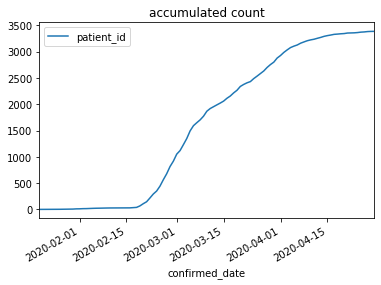

In [315]:
accumulated_count.plot()
plt.title('accumulated count')

Text(0.5, 1.0, 'Actual count')

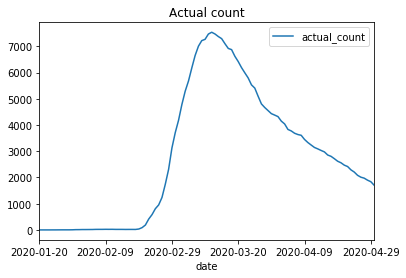

In [316]:
actual_count.plot()
plt.title('Actual count')

In [317]:
actual_count=pd.Series(actual_count['actual_count'])
actual_count.index=pd.to_datetime(actual_count.index)

In [318]:
actual_count

date
2020-01-20       1
2020-01-21       1
2020-01-22       1
2020-01-23       1
2020-01-24       2
              ... 
2020-04-26    2011
2020-04-27    1974
2020-04-28    1898
2020-04-29    1839
2020-04-30    1706
Name: actual_count, Length: 102, dtype: int64

In [320]:
data=actual_count.resample('D').first().fillna(0)
# data=data[:20]
x=np.arange(len(data)).reshape(-1,1)
y=data.values

In [321]:
data1=pd.DataFrame(data)
data1

,actual_count
date,
2020-01-20,1
2020-01-21,1
2020-01-22,1
2020-01-23,1
2020-01-24,2
...,...
2020-04-26,2011
2020-04-27,1974
2020-04-28,1898


In [322]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=[32, 32, 10], max_iter=50000, alpha=0.0005, random_state=26)
_=model.fit(x, y)

In [331]:
test = np.arange(len(data)+10).reshape(-1, 1)
pred = model.predict(test)
prediction = pred.round().astype(int)
week = [data.index[0] + timedelta(days=i) for i in range(len(prediction))]
dt_idx = pd.DatetimeIndex(week)
predicted_count = pd.Series(prediction, dt_idx)

In [332]:
predicted_count

2020-01-20   -355
2020-01-21    -55
2020-01-22     10
2020-01-23     10
2020-01-24     10
             ... 
2020-05-06    417
2020-05-07    296
2020-05-08    174
2020-05-09     52
2020-05-10    -70
Length: 112, dtype: int64

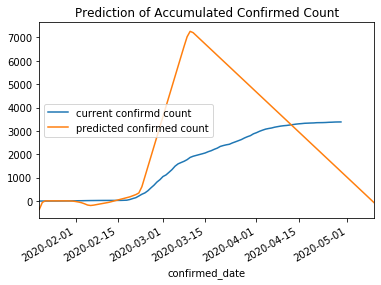

In [333]:
accumulated_count.plot()
predicted_count.plot()
plt.title('Prediction of Accumulated Confirmed Count')
plt.legend(['current confirmd count', 'predicted confirmed count'])
plt.show()

In [334]:
prophet= pd.DataFrame(data)
prophet
pr_data = prophet.reset_index()
pr_data.columns = ['ds','y']
pr_data

,ds,y
0,2020-01-20,1
1,2020-01-21,1
2,2020-01-22,1
3,2020-01-23,1
4,2020-01-24,2
...,...,...
97,2020-04-26,2011
98,2020-04-27,1974
99,2020-04-28,1898
100,2020-04-29,1839


In [339]:
model=Prophet()
model.fit(pr_data)
future=model.make_future_dataframe(periods=30)
forecast=model.predict(future)
forecast.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
127,2020-05-26,5862.108643,2926.234307,8592.098130,5859.928516,5864.283831,-54.938478,-54.938478,-54.938478,-54.938478,-54.938478,-54.938478,0.0,0.0,0.0,5807.170165
128,2020-05-27,5902.210247,2797.247208,8753.211802,5899.909456,5904.545582,-56.329986,-56.329986,-56.329986,-56.329986,-56.329986,-56.329986,0.0,0.0,0.0,5845.880262
129,2020-05-28,5942.311851,2920.290471,8542.057220,5939.882261,5944.790017,-114.095590,-114.095590,-114.095590,-114.095590,-114.095590,-114.095590,0.0,0.0,0.0,5828.216261
130,2020-05-29,5982.413455,3304.718226,8787.629857,5979.852316,5985.058211,85.828024,85.828024,85.828024,85.828024,85.828024,85.828024,0.0,0.0,0.0,6068.241480
131,2020-05-30,6022.515059,3151.192394,8737.853833,6019.813465,6025.305364,83.223369,83.223369,83.223369,83.223369,83.223369,83.223369,0.0,0.0,0.0,6105.738429


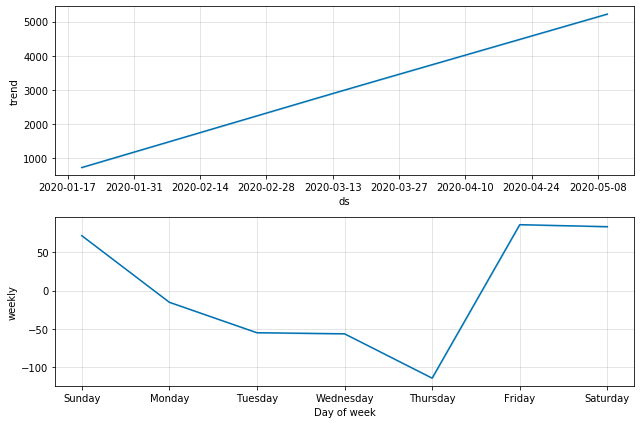

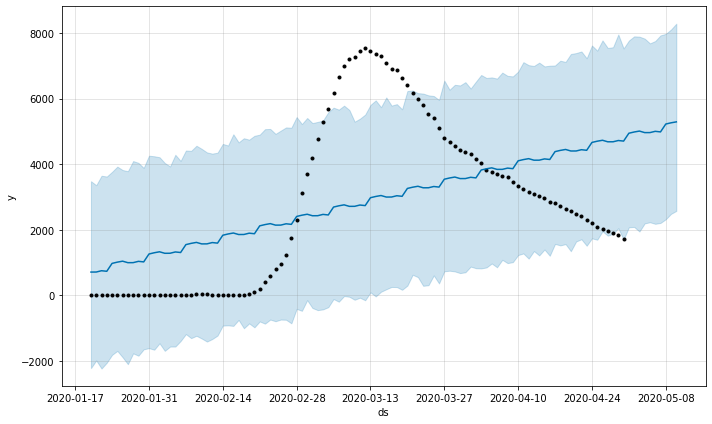

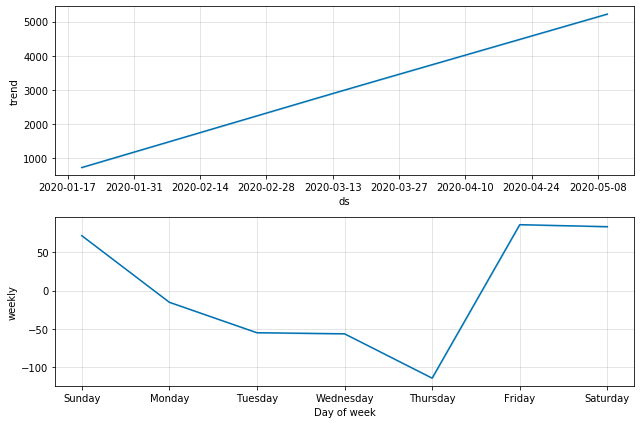

In [338]:
model.plot(forecast)
model.plot_components(forecast)

In [340]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
error = mean_absolute_percentage_error(actual_count[-102*1:].values,
                                       forecast.yhat[-102*1:].values)
print(error)

15717.455256322162


In [342]:
actual_count1=actual_count1.reset_index()

,date,actual_count
0,2020-01-20,1
1,2020-01-21,1
2,2020-01-22,1
3,2020-01-23,1
4,2020-01-24,2
...,...,...
97,2020-04-26,2011
98,2020-04-27,1974
99,2020-04-28,1898
100,2020-04-29,1839


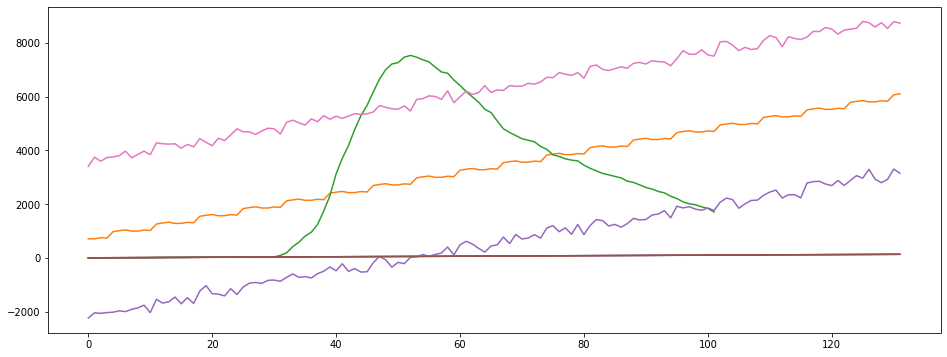

In [344]:
#预测与真实对比显示
plt.figure(figsize = (16,6))
plt.plot(forecast.yhat[-288*1:].reset_index())#预测
plt.plot(actual_count1['actual_count'])#真实
plt.plot(forecast.yhat_lower[-288*1:].reset_index())#预测下限
plt.plot(forecast.yhat_upper[-288*1:].reset_index())#预测上限

In [345]:
cnfrm = forecast.loc[:,['ds','trend']]
cnfrm = cnfrm[cnfrm['trend']>0]
cnfrm=cnfrm.tail(15)
cnfrm.columns = ['Date','Actual Infect']
cnfrm.head()

,Date,Actual Infect
117,2020-05-16,5461.092603
118,2020-05-17,5501.194207
119,2020-05-18,5541.295811
120,2020-05-19,5581.397415
121,2020-05-20,5621.499019


In [346]:
import plotly.graph_objs as go

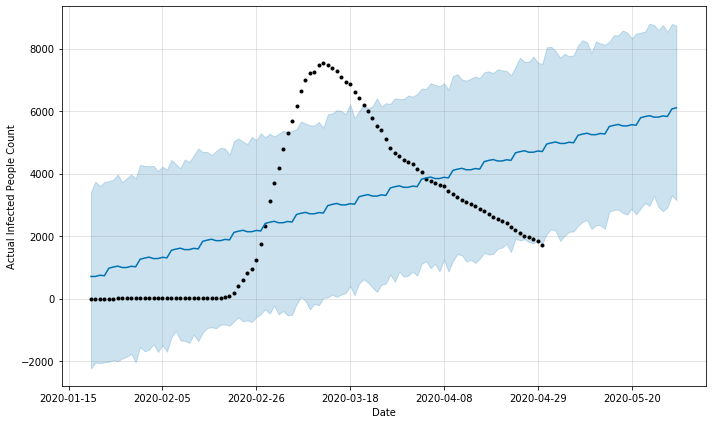

In [347]:
fig = plot_plotly(m, forecast)
py.iplot(fig) 
fig = m.plot(forecast,xlabel='Date',ylabel='Actual Infected People Count')